In [28]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.io
import pandas as pd

import matplotlib.style as style 
from matplotlib.offsetbox import AnchoredText
from context_helper import folders, compute_density

sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.patches as patches
from scipy.interpolate import UnivariateSpline
%matplotlib inline 
%autosave 5

Autosaving every 5 seconds


In [29]:
import argparse
parser=argparse.ArgumentParser()
parser.add_argument('--story', type=str)

args = parser.parse_args(args=['--story', 'tunnel'])

In [30]:
home_dir = folders['desk']
pod_name=args.story
datum_dir='/Users/manojkumar/Research/context-prediction/datum/podcast/%s/' % pod_name

results_dir='/Users/manojkumar/Research/context-prediction/outputs/'
model = 'GPT2'
results_dir_model= home_dir + 'outputs/' + '%s/' % model

In [31]:
file=datum_dir +'%s_button_data.csv' % pod_name
df=pd.read_csv(file, header=None)

In [32]:
data=df.to_numpy()

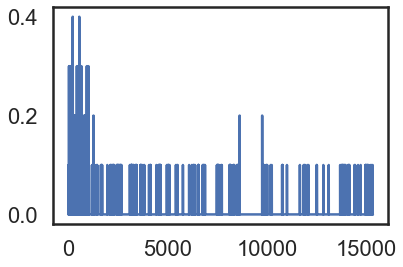

In [33]:
plt.plot(np.mean(data,axis=0))

In [34]:
data.shape

(10, 15345)

## Using KDE for proportion

In [56]:
time_indx_bp= data.nonzero()

In [63]:
data.shape

(10, 15345)

In [75]:
max(time_indx_bp[1])

15344

In [67]:
from KDEpy import FFTKDE as FFTKDE
kde=FFTKDE(kernel='gaussian',bw='ISJ')

In [119]:
x_grid=np.linspace(-1,15345,num =15347, endpoint=True)
y_kde= kde.fit(time_indx_bp[1]).evaluate(x_grid)

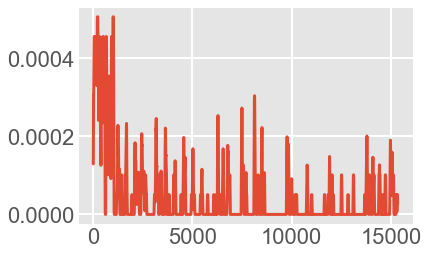

In [124]:
plt.plot(y_kde[1:-1])

In [128]:
kde.bw

8.046927866997205

<AxesSubplot:>

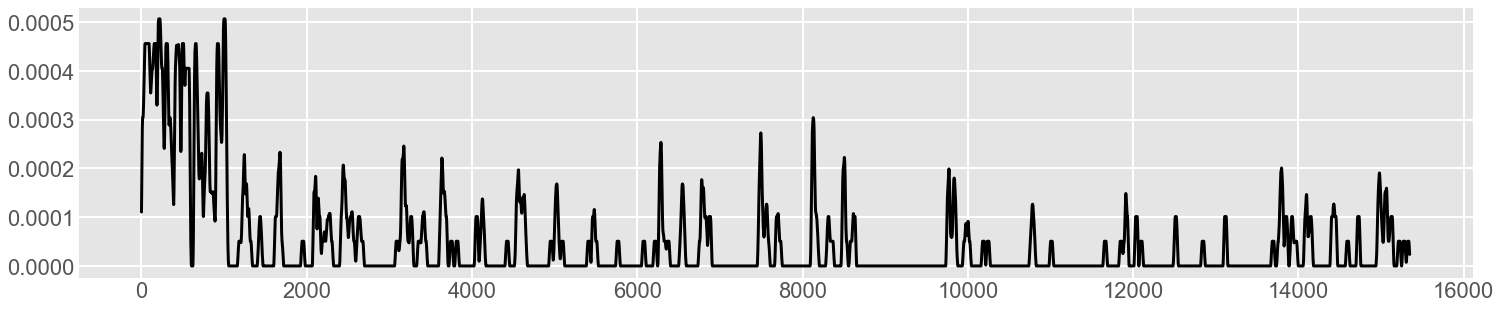

In [127]:
plt.figure(figsize=[25,5])

sns.lineplot(data=y_kde, color='black', ci=None )

In [125]:
df_button_density=pd.DataFrame(y_kde[1:-1])
df_button_density.to_csv(results_dir + '%s_button_density.csv' % pod_name)